In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
main_dir=r"/content/drive/MyDrive/Thesis_1"

In [ ]:
# import statistics as st
# overlap_df=pd.DataFrame(columns=df.columns)
# overlap=df[["V_adc_value","H_adc_value","Target"]].values
# id=1
# overlap_features=[]
# overlap_labels=[]
# for i in range(0,overlap.shape[0]-75,75):
#   temp_over_df=pd.DataFrame(overlap[i:i+125,0:2],columns=["V_adc_value","H_adc_value"])
#   overlap_features.append(overlap[i:i+125,0:2])
#   overlap_labels.append(int(st.mode(overlap[:,2][i:i+125])))
#   temp_over_df['Time']=np.arange(0,125/50,1/50)
#   temp_over_df['Target']=int(st.mode(overlap[:,2][i:i+125]))
#   temp_over_df["Id"]=id
#   id+=1
#   overlap_df=pd.concat([overlap_df,temp_over_df])

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import os
# #main_dir=r"f:/Thesis_1"
# o_features=[]
# o_labels=[]
# o_id=1
# o_activity={}
# o_df=pd.DataFrame()
# for index,folder in enumerate(os.listdir(main_dir)):
#     if not folder.endswith('.py'):
#         o_activity[index-1]=folder
#         sub_dir=os.path.join(main_dir,folder)
#         for files in os.listdir(sub_dir):
#             data=pd.read_csv(os.path.join(main_dir,sub_dir,files),usecols=['V_adc_value','H_adc_value'])
#             for i in range(0,data.shape[0],128):
#                 temp=data[i:i+128]
#                 if temp.shape[0]!=128:
#                     temp=np.pad(temp, ((0,(128-len(temp))),(0,0)), 'constant', constant_values=(0.0))
#                 temp_df=pd.DataFrame(temp,columns=data.columns)
#                 temp_df['Time']=np.arange(0,temp.shape[0]/50,1/50)
#                 temp_df['Id']=o_id
#                 temp_df['Target']=index-1
#                 o_id=o_id+1
#                 for key,group in temp_df.groupby('Id'):
#                   o_features.append(group[['V_adc_value','H_adc_value']].values)
#                   o_labels.append(i)
#                 o_df=pd.concat([o_df,temp_df])
# o_df.reset_index(inplace=True,drop=True)
# print(o_df.tail())
# o_features=np.array(o_features)
# o_labels=np.array(o_labels)
# print(o_features.shape)
# print(o_labels.shape)

In [ ]:
def time_shift(data,shift_amount=0.1,show=False):
    num_samples = data.shape[0]
    shift = int(shift_amount * num_samples)
    augmented = np.roll(data, shift, axis=0)
    if show:
     plt.subplot(2,2,1)
     plt.plot(data.iloc[:,0])
     plt.subplot(2,2,2)
     plt.plot(augmented[:,0])
     plt.subplot(2,2,3)
     plt.plot(data.iloc[:,1])
     plt.subplot(2,2,4)
     plt.plot(augmented[:,1])
     plt.show()
    return pd.DataFrame(augmented,columns=data.columns)

def noise_injection(data, noise_std=0.05,show=False):
    noise = np.random.normal(0, noise_std, size=data.shape)
    augmented = data + noise
    if show:
      plt.subplot(2,2,1)
      plt.plot(data.iloc[:,0])
      plt.subplot(2,2,2)
      plt.plot(augmented.iloc[:,0])
      plt.subplot(2,2,3)
      plt.plot(data.iloc[:,1])
      plt.subplot(2,2,4)
      plt.plot(augmented.iloc[:,1])
      plt.show()
    return augmented

def magnitude_scaling(data, scale_factor=0.1,show=False):
    augmented = data * scale_factor
    if show:
      plt.subplot(2,2,1)
      plt.plot(data.iloc[:,0])
      plt.subplot(2,2,2)
      plt.plot(augmented.iloc[:,0])
      plt.subplot(2,2,3)
      plt.plot(data.iloc[:,1])
      plt.subplot(2,2,4)
      plt.plot(augmented.iloc[:,1])
      plt.show()
    return augmented

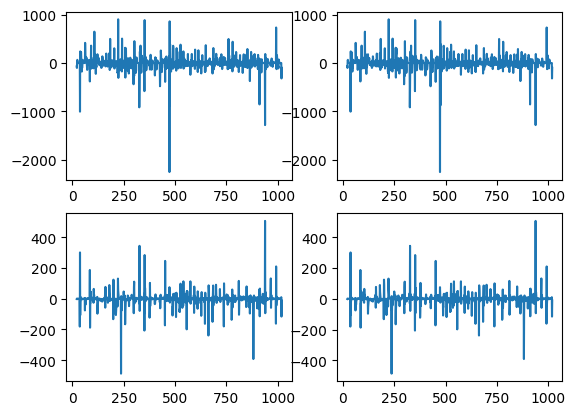

In [ ]:
Q=pd.read_csv(os.path.join('/content/drive/MyDrive/Thesis_1/Jump/J_file_0.csv'),usecols=['V_adc_value','H_adc_value']).iloc[-1000:]
ts_data=time_shift(Q)
ns_data=noise_injection(Q,show=True)

In [ ]:
time=np.array([np.arange(0,125/50,1/50)]*8*4).reshape(-1)

In [ ]:
df=pd.DataFrame()
count=0
activity={}
for i,folder in enumerate(os.listdir(main_dir)):
  activity[i]=folder
  sub_dir=os.path.join(main_dir,folder)
  for files in os.listdir(sub_dir):
    data=pd.read_csv(os.path.join(main_dir,sub_dir,files),usecols=['V_adc_value','H_adc_value'])
    data=data.iloc[-1000:,:]
    ts_data=time_shift(data,np.random.rand()*1.5)
    ns_data=noise_injection(data,np.random.rand()*1.5)
    ms_data=magnitude_scaling(data,np.random.rand()*1.5)
    data=pd.concat([data,ts_data,ns_data,ms_data])
    data['Time']=time
    data['Target']=i
    id=[[j+count]*125 for j in range(1,33)]
    id=np.array(id).reshape(-1)
    data['Id']=id
    print(data.tail())
    df=pd.concat([df,data])
    count=count+32

      V_adc_value  H_adc_value  Time  Target  Id
1011    -3.931880     0.786376  2.40       0  32
1012     2.359128     0.000000  2.42       0  32
1013     7.863761     0.000000  2.44       0  32
1014    -0.786376    -0.786376  2.46       0  32
1015   -14.941145    -0.786376  2.48       0  32
      V_adc_value  H_adc_value  Time  Target  Id
1024  -481.916252    71.005396  2.40       0  64
1025   343.192747    -6.574574  2.42       0  64
1026   -99.276063    -9.204403  2.44       0  64
1027   -46.022016    -1.972372  2.46       0  64
1028   -16.436434    -0.657457  2.48       0  64
      V_adc_value  H_adc_value  Time  Target  Id
1013     0.319102     0.045586  2.40       0  96
1014     0.364689     0.000000  2.42       0  96
1015     0.410275    -0.045586  2.44       0  96
1016     0.455861     0.000000  2.46       0  96
1017    -0.091172     0.000000  2.48       0  96
      V_adc_value  H_adc_value  Time  Target   Id
1027    12.800000    -5.688889  2.40       0  128
1028    18.488889 

In [ ]:
activity

{0: 'Run', 1: 'Jump', 2: 'Walk'}

In [ ]:
w1_new=pd.read_csv('/content/W_file_10.csv',usecols=['V_adc_value','H_adc_value'])
w2_new=pd.read_csv('/content/W_file_11.csv',usecols=['V_adc_value','H_adc_value'])
new=pd.concat([w1_new,w2_new])[:3000]
new['Time']=np.array([np.arange(0,125/50,1/50)]*8*3).reshape(-1)
new['Target']=2
id=[[j]*125 for j in range(865,865+24)]
id=np.array(id).reshape(-1)
new['Id']=id
df=pd.concat([df,new])
df

,V_adc_value,H_adc_value,Time,Target,Id
16,-10.0,0.0,0.00,0,1
17,-2.0,0.0,0.02,0,1
18,3.0,-1.0,0.04,0,1
19,-2.0,0.0,0.06,0,1
20,-1.0,2.0,0.08,0,1
...,...,...,...,...,...
42,0.0,0.0,2.40,2,888
43,-2.0,0.0,2.42,2,888
44,-3.0,0.0,2.44,2,888
45,-2.0,0.0,2.46,2,888


In [ ]:
J_new=pd.read_csv('/content/J_file_7.csv',usecols=['V_adc_value','H_adc_value'])[:3500]
J_new['Time']=np.array([np.arange(0,125/50,1/50)]*28).reshape(-1)
J_new['Target']=1
id=[[j]*125 for j in range(889,889+28)]
id=np.array(id).reshape(-1)
J_new['Id']=id
df=pd.concat([df,J_new])
df

FileNotFoundError: ignored

In [ ]:
activity[3]='Fall'
activity

{0: 'Run', 1: 'Jump', 2: 'Walk', 3: 'Fall'}

In [ ]:
count=916
for i in range(6):
  F_new=pd.read_csv(f'/content/F_file_{i}.csv',usecols=['V_adc_value','H_adc_value'])[-490:]
  ts_data=time_shift(F_new,np.random.rand()*1.5)
  ns_data=noise_injection(F_new,np.random.rand()*1.5)
  ms_data=magnitude_scaling(F_new,np.random.rand()*1.5)
  F_new=pd.concat([F_new,ts_data,ns_data,ms_data])
  F_new['Time']=np.array([np.arange(0,245/50,1/50)]*2*4).reshape(-1)
  F_new['Target']=3
  id=[[j+count]*245 for j in range(1,9)]
  id=np.array(id).reshape(-1)
  F_new['Id']=id
  count=count+8
  df=pd.concat([df,F_new])

In [ ]:
df.reset_index(inplace=True,drop=True)
df

,V_adc_value,H_adc_value,Time,Target,Id
0,-10.000000,0.0,0.00,0,1
1,-2.000000,0.0,0.02,0,1
2,3.000000,-1.0,0.04,0,1
3,-2.000000,0.0,0.06,0,1
4,-1.000000,2.0,0.08,0,1
...,...,...,...,...,...
126255,0.000000,0.0,4.80,3,964
126256,-2.837488,0.0,4.82,3,964
126257,0.000000,0.0,4.84,3,964
126258,-1.418744,0.0,4.86,3,964


In [ ]:
df=pd.read_csv('/content/Data (1).csv')

In [ ]:
df.to_csv('Data.csv')
labels=[]
for key,group in df.groupby('Id'):
    labels.append(group.Target.unique())


In [ ]:
labels=np.array(labels).ravel()
print(labels.shape)

(964,)


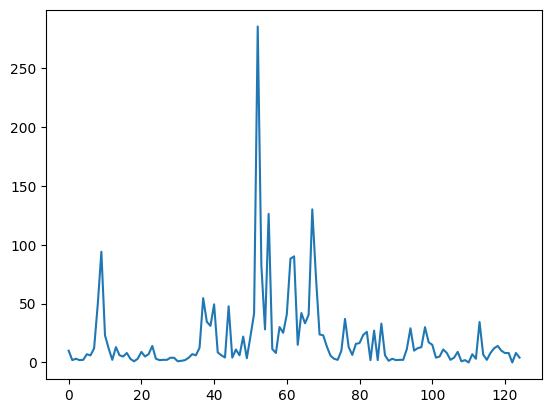

In [ ]:
import math
v=df[df.Id==1].V_adc_value.values
h=df[df.Id==1].H_adc_value.values
all=np.sqrt((v**2+h**2))
v=v * math.cos(math.pi / 2)
h=h * math.sin(math.pi / 2)
all1=np.sqrt((v**2+h**2))
plt.plot(all)

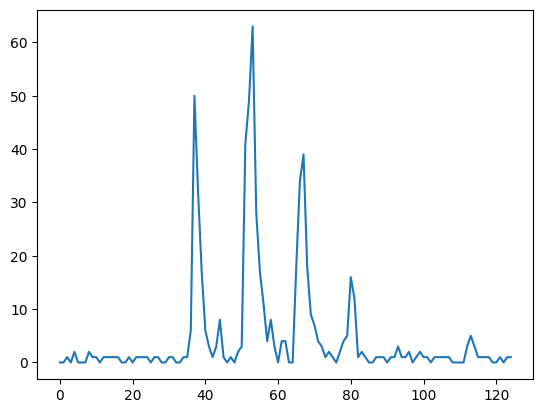

In [ ]:
plt.plot(all1)

<Figure size 3000x3000 with 0 Axes>

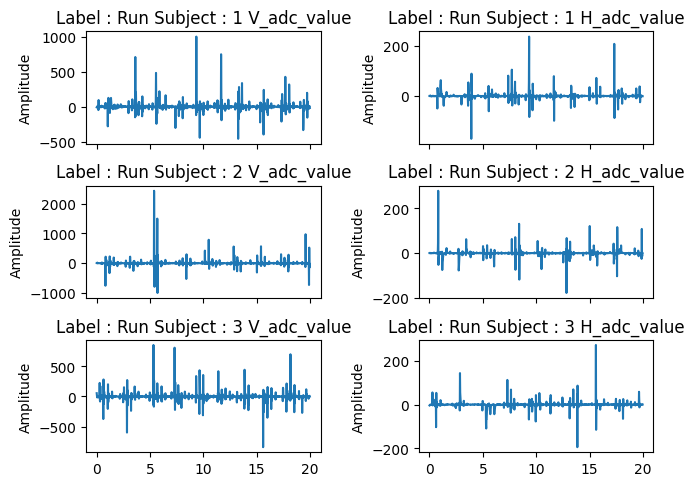

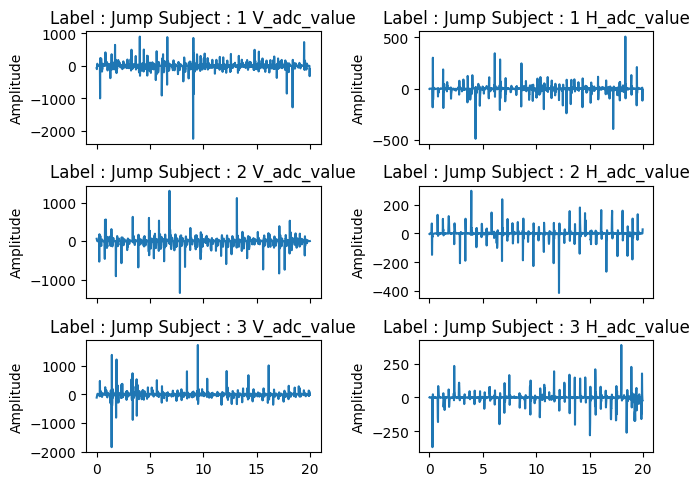

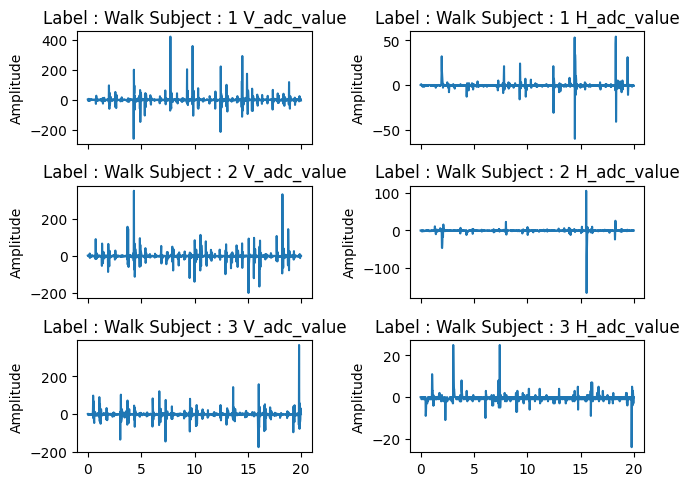

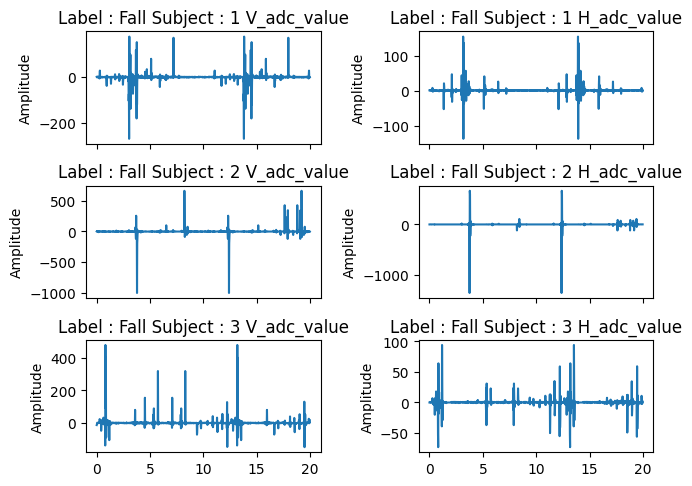

In [ ]:
import math
x_axis=np.arange(0,1000/50,1/50)
plt.figure(figsize=(30,30))
for key,value in df.groupby('Target'):
  fig,ax=plt.subplots(3,2,sharex=True,)
  fig.tight_layout(h_pad=2,w_pad=4)
  for i in range(3):
    for j in range(2):
      if j==0:
        ax[i,j].plot(x_axis,value.V_adc_value[i*4*1000:(i*4+1)*1000])
        ax[i,j].set_ylabel('Amplitude')
        ax[i,j].set_title(f"Label : {activity[key]} Subject : {i+1} V_adc_value")
      elif j==1:
        ax[i,j].plot(x_axis,value.H_adc_value[i*4*1000:(i*4+1)*1000])
        ax[i,j].set_ylabel('Amplitude')
        ax[i,j].set_title(f"Label : {activity[key]} Subject : {i+1} H_adc_value")
      # else:
      #   ax[i,j].plot(x_axis,np.sqrt(((value.V_adc_value[i*1000:(i+1)*1000]**2)+(value.H_adc_value[i*1000:(i+1)*1000]**2))))
      #   ax[i,j].set_title(f"Label : {activity[key]} Subject : {i+1} total_value")


plt.show()

In [ ]:
target_df=pd.Series(labels)
target_df.index=np.arange(1,target_df.shape[0]+1)

In [ ]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 12.0 MB/s eta 0:00:00


In [ ]:
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_selection.relevance import calculate_relevance_table
df_X=df[['Time','V_adc_value','H_adc_value','Id']]
X_extracted = extract_features(df_X, column_id="Id", column_sort="Time")

Feature Extraction: 100%|██████████| 1928/1928 [03:41<00:00,  8.70it/s]


In [ ]:
X_extracted

,V_adc_value__variance_larger_than_standard_deviation,V_adc_value__has_duplicate_max,V_adc_value__has_duplicate_min,V_adc_value__has_duplicate,V_adc_value__sum_values,V_adc_value__abs_energy,V_adc_value__mean_abs_change,V_adc_value__mean_change,V_adc_value__mean_second_derivative_central,V_adc_value__median,...,H_adc_value__fourier_entropy__bins_5,H_adc_value__fourier_entropy__bins_10,H_adc_value__fourier_entropy__bins_100,H_adc_value__permutation_entropy__dimension_3__tau_1,H_adc_value__permutation_entropy__dimension_4__tau_1,H_adc_value__permutation_entropy__dimension_5__tau_1,H_adc_value__permutation_entropy__dimension_6__tau_1,H_adc_value__permutation_entropy__dimension_7__tau_1,H_adc_value__query_similarity_count__query_None__threshold_0.0,H_adc_value__mean_n_absolute_max__number_of_maxima_7
1,1.0,0.0,0.0,1.0,-271.000000,1.716850e+05,24.693548,0.048387,-0.016260,-2.000000,...,0.574268,0.980271,2.723726,1.676867,2.789558,3.728890,4.282015,4.537339,NaN,44.000000
2,1.0,0.0,0.0,1.0,63.000000,7.099030e+05,44.758065,0.032258,0.016260,-3.000000,...,1.577765,2.217666,3.727528,1.541144,2.596983,3.522718,4.115921,4.436662,NaN,65.714286
3,1.0,0.0,0.0,1.0,350.000000,5.318780e+05,37.120968,-0.169355,-0.109756,-1.000000,...,1.346498,1.924024,3.559796,1.656622,2.838367,3.801458,4.435029,4.716479,NaN,39.000000
4,1.0,0.0,0.0,1.0,135.000000,1.337447e+06,53.435484,0.096774,0.077236,-1.000000,...,1.559960,2.218187,3.744139,1.718497,2.960283,3.996295,4.570827,4.744175,NaN,92.285714
5,1.0,0.0,0.0,1.0,670.000000,7.087240e+05,38.129032,0.951613,-0.691057,-1.000000,...,1.402230,1.960055,3.234305,1.731906,3.003689,4.046687,4.539001,4.720876,NaN,38.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1.0,1.0,0.0,1.0,-264.000000,2.842000e+03,2.356557,0.012295,-0.034979,-1.000000,...,1.061218,1.720774,3.693329,1.300528,2.128890,2.888193,3.489851,3.986371,NaN,6.714286
961,1.0,0.0,0.0,0.0,71.069116,6.645847e+05,20.094880,-0.003345,0.011453,-0.937670,...,0.994802,1.657789,3.622250,1.763051,3.075931,4.409605,5.229317,5.430060,NaN,57.110137
962,1.0,0.0,0.0,0.0,-282.262582,2.611352e+03,2.236440,-0.011576,0.007466,-1.057574,...,1.147485,1.778149,3.848266,1.775449,3.137215,4.497391,5.256782,5.459062,NaN,6.650684
963,1.0,0.0,0.0,1.0,96.474596,1.337980e+06,28.438841,-0.005815,0.017515,-1.418744,...,0.976523,1.639481,3.624450,1.583008,2.697684,3.674023,4.388187,4.807042,NaN,81.071089


In [ ]:
X_extracted=impute(X_extracted)
X_extracted

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['V_adc_value__query_similarity_count__query_None__threshold_0.0'
 'H_adc_value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,V_adc_value__variance_larger_than_standard_deviation,V_adc_value__has_duplicate_max,V_adc_value__has_duplicate_min,V_adc_value__has_duplicate,V_adc_value__sum_values,V_adc_value__abs_energy,V_adc_value__mean_abs_change,V_adc_value__mean_change,V_adc_value__mean_second_derivative_central,V_adc_value__median,...,H_adc_value__fourier_entropy__bins_5,H_adc_value__fourier_entropy__bins_10,H_adc_value__fourier_entropy__bins_100,H_adc_value__permutation_entropy__dimension_3__tau_1,H_adc_value__permutation_entropy__dimension_4__tau_1,H_adc_value__permutation_entropy__dimension_5__tau_1,H_adc_value__permutation_entropy__dimension_6__tau_1,H_adc_value__permutation_entropy__dimension_7__tau_1,H_adc_value__query_similarity_count__query_None__threshold_0.0,H_adc_value__mean_n_absolute_max__number_of_maxima_7
1,1.0,0.0,0.0,1.0,-271.000000,1.716850e+05,24.693548,0.048387,-0.016260,-2.000000,...,0.574268,0.980271,2.723726,1.676867,2.789558,3.728890,4.282015,4.537339,0.0,44.000000
2,1.0,0.0,0.0,1.0,63.000000,7.099030e+05,44.758065,0.032258,0.016260,-3.000000,...,1.577765,2.217666,3.727528,1.541144,2.596983,3.522718,4.115921,4.436662,0.0,65.714286
3,1.0,0.0,0.0,1.0,350.000000,5.318780e+05,37.120968,-0.169355,-0.109756,-1.000000,...,1.346498,1.924024,3.559796,1.656622,2.838367,3.801458,4.435029,4.716479,0.0,39.000000
4,1.0,0.0,0.0,1.0,135.000000,1.337447e+06,53.435484,0.096774,0.077236,-1.000000,...,1.559960,2.218187,3.744139,1.718497,2.960283,3.996295,4.570827,4.744175,0.0,92.285714
5,1.0,0.0,0.0,1.0,670.000000,7.087240e+05,38.129032,0.951613,-0.691057,-1.000000,...,1.402230,1.960055,3.234305,1.731906,3.003689,4.046687,4.539001,4.720876,0.0,38.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1.0,1.0,0.0,1.0,-264.000000,2.842000e+03,2.356557,0.012295,-0.034979,-1.000000,...,1.061218,1.720774,3.693329,1.300528,2.128890,2.888193,3.489851,3.986371,0.0,6.714286
961,1.0,0.0,0.0,0.0,71.069116,6.645847e+05,20.094880,-0.003345,0.011453,-0.937670,...,0.994802,1.657789,3.622250,1.763051,3.075931,4.409605,5.229317,5.430060,0.0,57.110137
962,1.0,0.0,0.0,0.0,-282.262582,2.611352e+03,2.236440,-0.011576,0.007466,-1.057574,...,1.147485,1.778149,3.848266,1.775449,3.137215,4.497391,5.256782,5.459062,0.0,6.650684
963,1.0,0.0,0.0,1.0,96.474596,1.337980e+06,28.438841,-0.005815,0.017515,-1.418744,...,0.976523,1.639481,3.624450,1.583008,2.697684,3.674023,4.388187,4.807042,0.0,81.071089


In [ ]:
X_selected = select_features(X_extracted,target_df.values, ml_task="classification", n_jobs=4)

In [ ]:
X_selected

,V_adc_value__number_crossing_m__m_1,V_adc_value__number_crossing_m__m_0,V_adc_value__number_peaks__n_10,V_adc_value__quantile__q_0.4,V_adc_value__number_cwt_peaks__n_5,V_adc_value__number_peaks__n_1,V_adc_value__number_crossing_m__m_-1,V_adc_value__permutation_entropy__dimension_3__tau_1,V_adc_value__permutation_entropy__dimension_4__tau_1,V_adc_value__partial_autocorrelation__lag_4,...,"H_adc_value__linear_trend__attr_""intercept""","H_adc_value__agg_autocorrelation__f_agg_""var""__maxlag_40",H_adc_value__partial_autocorrelation__lag_4,"H_adc_value__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)",H_adc_value__partial_autocorrelation__lag_9,"H_adc_value__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)"
1,50.0,52.0,7.0,-5.000000,14.0,37.0,48.0,1.778402,3.031799,0.121954,...,1.455238,0.031867,0.004342,0.696273,-0.007132,-12.123624,0.307929,0.444516,-12.734411,0.575047
2,60.0,62.0,5.0,-4.400000,10.0,35.0,64.0,1.764781,3.061656,0.053268,...,-2.547048,0.003998,0.030147,8.017182,-0.043200,-2.269518,10.357448,9.670193,-3.531715,8.872109
3,56.0,60.0,6.0,-3.400000,8.0,35.0,62.0,1.766210,3.064341,0.052588,...,-0.401905,0.003708,-0.074129,1.038158,0.004587,-7.369167,-0.988760,-0.234193,-7.797787,0.445208
4,61.0,67.0,7.0,-4.000000,6.0,38.0,67.0,1.756900,3.080858,0.012889,...,2.476571,0.003809,0.007658,2.631309,-0.021611,18.586751,10.747326,8.182772,19.914638,5.441699
5,54.0,56.0,6.0,-3.000000,10.0,35.0,58.0,1.765008,3.055364,-0.068155,...,-1.358857,0.010219,-0.164932,-2.710020,-0.043980,-6.205885,-2.765144,-2.737986,-6.428715,-2.725827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,34.0,48.0,5.0,-1.000000,23.0,41.0,102.0,1.660228,2.875079,-0.010428,...,0.074365,0.004213,-0.053408,-0.730483,0.017422,-0.699413,-0.550005,-0.628920,-0.704680,-0.690050
961,62.0,94.0,10.0,-1.453548,19.0,70.0,104.0,1.772913,3.112965,-0.088310,...,0.165508,0.007147,0.101815,1.308157,0.002828,3.546090,2.854219,2.373325,3.728951,1.851288
962,37.0,77.0,7.0,-1.272885,22.0,67.0,120.0,1.762272,3.079664,0.070418,...,0.096811,0.004692,-0.043670,-0.192784,0.006871,-0.628829,-0.150380,-0.161977,-0.627525,-0.176582
963,72.0,72.0,10.0,-1.986242,20.0,51.0,98.0,1.747737,3.066427,-0.088861,...,0.275416,0.007124,0.103020,1.851930,0.004100,5.273498,4.050737,3.366969,5.556023,2.624830


In [ ]:
X_selected.index=X_selected.index-1
target_df.index=target_df.index-1

In [ ]:
from sklearn.preprocessing import StandardScaler
StdS=StandardScaler()
Scaled_X_selected=StdS.fit_transform(X_selected)
Scaled_X_selected=pd.DataFrame(Scaled_X_selected,columns=X_selected.columns)

In [ ]:
Scaled_X_selected

,V_adc_value__number_crossing_m__m_1,V_adc_value__number_crossing_m__m_0,V_adc_value__number_peaks__n_10,V_adc_value__quantile__q_0.4,V_adc_value__number_cwt_peaks__n_5,V_adc_value__number_peaks__n_1,V_adc_value__number_crossing_m__m_-1,V_adc_value__permutation_entropy__dimension_3__tau_1,V_adc_value__permutation_entropy__dimension_4__tau_1,V_adc_value__partial_autocorrelation__lag_4,...,"H_adc_value__linear_trend__attr_""intercept""","H_adc_value__agg_autocorrelation__f_agg_""var""__maxlag_40",H_adc_value__partial_autocorrelation__lag_4,"H_adc_value__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)",H_adc_value__partial_autocorrelation__lag_9,"H_adc_value__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)","H_adc_value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)"
0,0.631750,0.203298,1.618173,-1.114835,0.778490,0.425831,-0.427924,0.807029,0.297493,1.940069,...,0.565089,3.581027,0.439573,0.161454,-0.040553,-0.483465,0.178184,0.174344,-0.499593,0.168695
1,1.459204,1.018519,0.148631,-0.853732,-0.421773,0.181194,0.528502,0.488333,0.575148,1.327857,...,-0.470446,-0.925344,0.714871,0.538549,-0.751728,0.048586,0.672840,0.630884,-0.015140,0.585304
2,1.128222,0.855474,0.883402,-0.418560,-1.021905,0.181194,0.408949,0.521765,0.600122,1.321798,...,0.084580,-0.972224,-0.397579,0.179064,0.190507,-0.226759,0.114359,0.140757,-0.239717,0.162175
3,1.541950,1.426129,1.618173,-0.679663,-1.622037,0.548149,0.707832,0.303913,0.753718,0.967952,...,0.829345,-0.955816,0.474952,0.261126,-0.326047,1.174673,0.692031,0.557277,1.219133,0.413057
4,0.962731,0.529386,0.883402,-0.244491,-0.421773,0.181194,0.169843,0.493637,0.516632,0.245588,...,-0.163018,0.080687,-1.366295,-0.014002,-0.767108,-0.163950,0.026922,0.016855,-0.167646,0.002952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,-0.692178,-0.122791,0.148631,0.625854,3.479083,0.915105,2.800014,-1.958074,-1.159923,0.760122,...,0.207808,-0.890616,-0.176515,0.087963,0.443580,0.133360,0.135955,0.121224,0.133682,0.105172
960,1.624695,3.627225,3.822485,0.428482,2.278820,4.462342,2.919568,0.678610,1.052293,0.065943,...,0.231390,-0.416159,1.479454,0.192972,0.155823,0.362586,0.303517,0.269792,0.367079,0.232777
961,-0.443941,2.241350,1.618173,0.507102,3.179017,4.095386,3.875994,0.429618,0.742613,1.480721,...,0.213616,-0.813068,-0.072629,0.115659,0.235551,0.137171,0.155626,0.144331,0.137743,0.130954
962,2.452150,1.833739,3.822485,0.196669,2.578886,2.138290,2.560908,0.089521,0.619518,0.061039,...,0.259827,-0.419795,1.492304,0.220981,0.180911,0.455854,0.362412,0.318963,0.463260,0.271618


In [ ]:
result={}

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(50, random_state=42)
pca_x = pca.fit_transform(Scaled_X_selected)
#pca_res = pd.DataFrame(pca_res)
#pca_res = pd.concat([pca_res,target_df], axis=1, sort=False )
# fig = px.scatter(
#             pca_res,
#             x=pca_res[:,0],
#             y=pca_res[:,1],
#             color=target_df,
#             hover_name=0,
#             width=970,
#             height=500,
#             template="ggplot2",
#             color_discrete_sequence=[
#                 px.colors.qualitative.Vivid[0],
#                 px.colors.qualitative.Vivid[1],
#             ],
#             size_max=0.1,
#         )
# fig.show()

# giving a larger plot
# plt.scatter(pca_res[:, 0],pca_res[:, 1],
#             c=overlap_target_df,
#             cmap='plasma')

# # labeling x and y axes
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

Performing TSNE with perplexity 2 and iterations 1000
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 964 samples in 0.001s...
[t-SNE] Computed neighbors for 964 samples in 0.278s...
[t-SNE] Computed conditional probabilities for sample 964 / 964
[t-SNE] Mean sigma: 2.773377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.081490
[t-SNE] KL divergence after 1000 iterations: 0.570574
done...
creating plot for TSNE visualization..
Performing TSNE with perplexity 5 and iterations 1000
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 964 samples in 0.001s...
[t-SNE] Computed neighbors for 964 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 964 / 964
[t-SNE] Mean sigma: 4.604317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.650948
[t-SNE] KL divergence after 1000 iterations: 0.730851
done...
creating plot for TSNE visualization..
Performing TSNE with perplexity 10 and iterations 1000
[t-SNE] Computin

<Figure size 700x700 with 0 Axes>

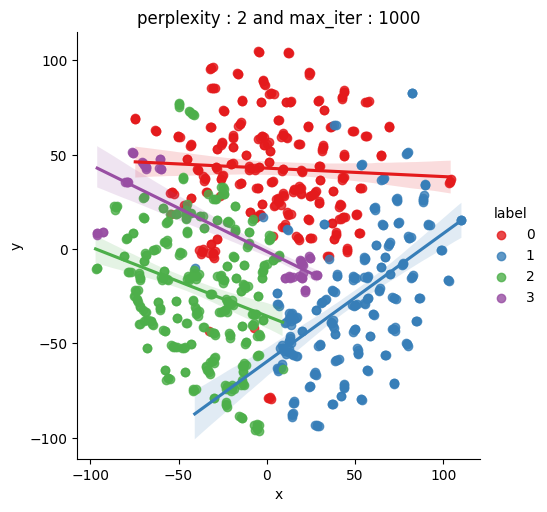

<Figure size 700x700 with 0 Axes>

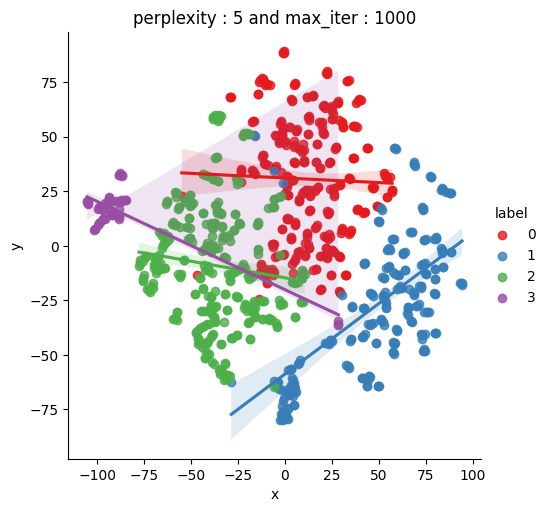

<Figure size 700x700 with 0 Axes>

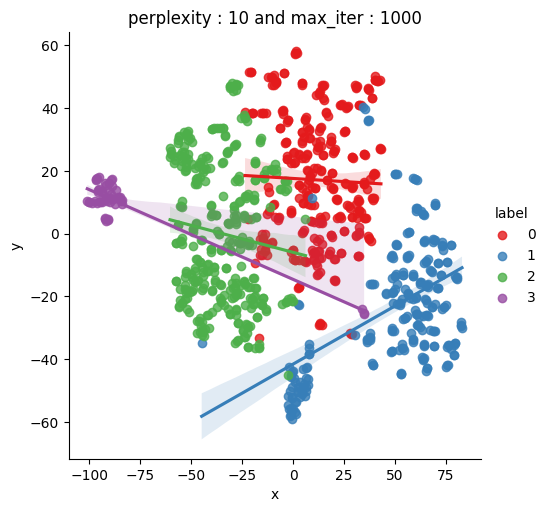

<Figure size 700x700 with 0 Axes>

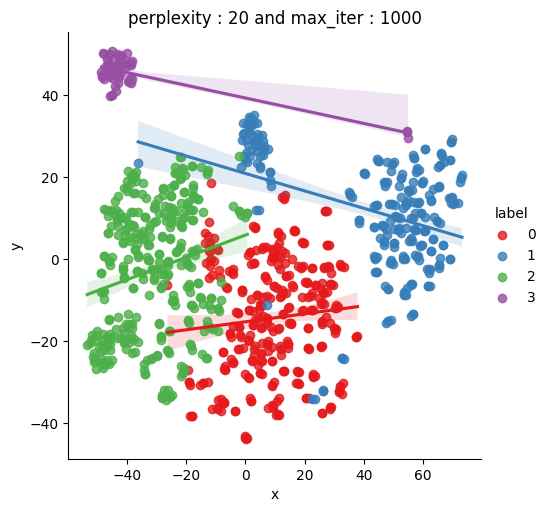

<Figure size 700x700 with 0 Axes>

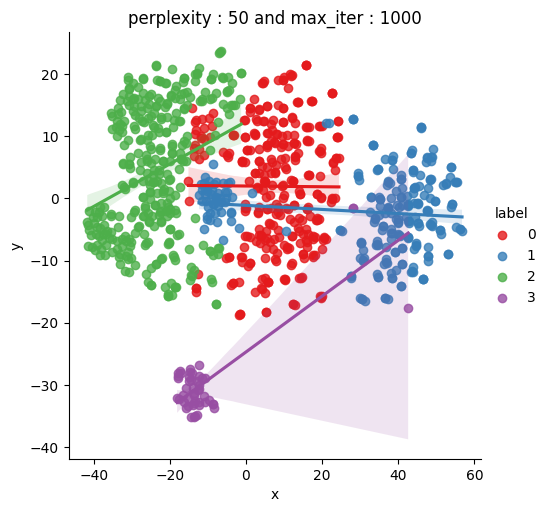

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

def perform_tsne(x_train, y_train, perplexities, n_iter= 1000):
  for index, per in enumerate(perplexities):
    print('Performing TSNE with perplexity {} and iterations {}'.format(per, n_iter))
    x_reduced= TSNE(verbose= 1, perplexity= per).fit_transform(x_train)
    print('done...')
    df= pd.DataFrame({'x':x_reduced[:,0], 'y':x_reduced[:,1], 'label':y_train})
    print('creating plot for TSNE visualization..')
    plt.figure(figsize= (7, 7))
    sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg=True, palette= 'Set1')
    plt.title("perplexity : {} and max_iter : {}".format(per, n_iter))
    img_name = 'tsne' + '_perp_{}_iter_{}.png'.format(per, n_iter)

  return x_reduced

tsne_x=perform_tsne(pca_x,target_df, perplexities =[2,5,10,20,50])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tsne_x,target_df,test_size=0.2, random_state=42,stratify=target_df)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(771, 2) (771,)
(193, 2) (193,)


In [ ]:
from sklearn.model_selection import GridSearchCV as GS
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
model_results= {}

def perform_model(model, x_train, y_train, x_test, y_test, cmap= plt.cm.Greens, modelname=''):
  start_time= datetime.now()
  print('model name:', modelname)
  print('training the model...')
  model.fit(x_train, y_train)
  print('done training...')
  traintime= datetime.now() - start_time
  print('time taken:', traintime)

  # Predict test data
  print('predicting data...')
  start_time= datetime.now()
  y_pred= model.best_estimator_.predict(x_test)
  accuracy= metrics.accuracy_score(y_true= y_test, y_pred= y_pred)
  precision= metrics.precision_score(y_true= y_test, y_pred= y_pred,average='micro')
  recall= metrics.recall_score(y_true= y_test, y_pred= y_pred,average='micro')
  f1= metrics.f1_score(y_true= y_test, y_pred= y_pred,average='micro')
  predtime= datetime.now() - start_time
  print('prediction time', predtime)
  print('done prediction... accuracy score = {:.2f}'.format(accuracy*100))
  print('drawing confusion matrix...')
  model_results[modelname+ '_test_score']= accuracy * 100
  model_results[modelname+ '_precision_score']= precision
  model_results[modelname+ '_recall_score']= recall
  model_results[modelname+ '_f1_score']= f1
  model_results[modelname+ '_best_param']= model.best_params_
  model_results[modelname+ '_cv_score']= model.best_score_ * 100
  model_results[modelname+ '_training_time']= traintime

  # if result.get(pca,-1) == -1:
  #       result[pca]=[]
  # result[pca].append(accuracy)

  # # draw confusion matrix
  # cm = metrics.confusion_matrix(y_test, y_pred)
  # plt.figure(figsize= (7,7))
  # sns.heatmap(cm, annot= True, fmt= 'd', cmap= cmap, xticklabels= list(activity.values()), yticklabels= list(activity.values()), )
  # plt.title('Confusion Matrix')

  # # normalized confusion matrix
  # ncm= cm/((cm.sum(axis=1).reshape(-1, 1)))
  # plt.figure(figsize= (7,7))
  # sns.heatmap(ncm, annot= True, fmt= '.2f', cmap= cmap, xticklabels= list(activity.values()), yticklabels= list(activity.values()), )
  # plt.title('Normalized Confusion Matrix')
  # plt.plot()

In [ ]:
# from sklearn import linear_model
# logistic_regression = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
# parameters= {'C': [0.01, 0.1, 1, 10, 20, 30]}
# logistic_regression_grid= GS(logistic_regression, param_grid= parameters, cv= 3, verbose= 1, n_jobs= -1)
# perform_model(logistic_regression_grid, X_train, y_train, X_test, y_test, modelname= 'logistic_regression')
# print(logistic_regression_grid.best_estimator_)
# print('best CV score', '{:.2f}'.format(logistic_regression_grid.best_score_*100))

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# parameters= {'max_depth': np.arange(1, 10, 2)}
# dt= DecisionTreeClassifier()
# grid_dt= GS(dt, param_grid= parameters, n_jobs= -1, verbose= 1)
# perform_model(grid_dt, X_train, y_train, X_test, y_test, pca=25,modelname= 'decision_trees')
# print(grid_dt.best_estimator_)
# print('best CV score', '{:.2f}'.format(grid_dt.best_score_*100))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters={'max_depth': np.arange(1, 10, 2),'n_estimators': np.arange(100, 300, 50)}
rf = RandomForestClassifier()
rf_grid= GS(rf, param_grid= parameters, cv= 3, verbose= 1, n_jobs= -1)
perform_model(rf_grid, X_train, y_train, X_test, y_test,modelname= 'rf')
print(rf_grid.best_estimator_)
print('best CV score', '{:.2f}'.format(rf_grid.best_score_*100))

model name: rf
training the model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
done training...
time taken: 0:00:20.254004
predicting data...
prediction time 0:00:00.031969
done prediction... accuracy score = 97.93
drawing confusion matrix...
RandomForestClassifier(max_depth=9, n_estimators=250)
best CV score 97.80


In [ ]:
from sklearn.svm import SVC
parameters= {'kernel':['linear','rbf'],'C': [0.125, 0.5, 1, 2, 8, 16]}
svc=SVC(tol= 0.00005 ,gamma=0.5)
grid_svc= GS(svc, param_grid= parameters, cv= 3, n_jobs= -1, verbose= 1)
perform_model(grid_svc, X_train, y_train, X_test, y_test,modelname= 'svc')
print(grid_svc.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_svc.best_score_*100))

model name: svc
training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
done training...
time taken: 0:02:27.668658
predicting data...
prediction time 0:00:00.029411
done prediction... accuracy score = 97.93
drawing confusion matrix...
SVC(C=2, gamma=0.5, tol=5e-05)
best CV score 92.87


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters={'n_neighbors':np.arange(1,20,2)}
grid_knn=GS(knn,param_grid=parameters,n_jobs=-1,verbose=1)
perform_model(grid_knn, X_train, y_train, X_test, y_test,modelname= 'knn')
print(grid_knn.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_knn.best_score_*100))

model name: knn
training the model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
done training...
time taken: 0:00:00.598527
predicting data...
prediction time 0:00:00.012412
done prediction... accuracy score = 97.93
drawing confusion matrix...
KNeighborsClassifier(n_neighbors=1)
best CV score 97.80


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
parameters= {'max_depth': np.arange(5,10,1), 'n_estimators': np.arange(100, 300, 50)}
gbdt= GradientBoostingClassifier()
grid_gbdt= GS(gbdt, param_grid= parameters, cv=3, verbose= 1, n_jobs= -1)
perform_model(grid_gbdt, X_train, y_train, X_test, y_test, modelname= 'GBDT')
print(grid_gbdt.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_gbdt.best_score_*100))

model name: GBDT
training the model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
done training...
time taken: 0:01:10.725688
predicting data...
prediction time 0:00:00.014374
done prediction... accuracy score = 96.89
drawing confusion matrix...
GradientBoostingClassifier(max_depth=5)
best CV score 96.76


In [ ]:
import xgboost as xgb
parameters= {'max_depth': np.arange(5,10,1), 'n_estimators': np.arange(100, 300, 50)}
xgb=xgb.XGBRFClassifier()
grid_xgb=GS(xgb, param_grid= parameters,cv=3,verbose=1,n_jobs=-1)
perform_model(grid_xgb, X_train, y_train, X_test, y_test, modelname= 'XGRF')
print(grid_xgb.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_xgb.best_score_*100))

model name: XGRF
training the model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
done training...
time taken: 0:00:12.972311
predicting data...
prediction time 0:00:00.012164
done prediction... accuracy score = 97.41
drawing confusion matrix...
XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=150, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, rand

In [ ]:
model_results

{'rf_test_score': 97.92746113989638,
 'rf_precision_score': 0.9792746113989638,
 'rf_recall_score': 0.9792746113989638,
 'rf_f1_score': 0.9792746113989638,
 'rf_best_param': {'max_depth': 9, 'n_estimators': 250},
 'rf_cv_score': 97.79507133592737,
 'rf_training_time': datetime.timedelta(seconds=20, microseconds=254004),
 'svc_test_score': 97.92746113989638,
 'svc_precision_score': 0.9792746113989638,
 'svc_recall_score': 0.9792746113989638,
 'svc_f1_score': 0.9792746113989638,
 'svc_best_param': {'C': 2, 'kernel': 'rbf'},
 'svc_cv_score': 92.86640726329442,
 'svc_training_time': datetime.timedelta(seconds=147, microseconds=668658),
 'knn_test_score': 97.92746113989638,
 'knn_precision_score': 0.9792746113989638,
 'knn_recall_score': 0.9792746113989638,
 'knn_f1_score': 0.9792746113989638,
 'knn_best_param': {'n_neighbors': 1},
 'knn_cv_score': 97.79639715123587,
 'knn_training_time': datetime.timedelta(microseconds=598527),
 'GBDT_test_score': 96.89119170984456,
 'GBDT_precision_score'

In [ ]:
tsne_results=[97.92746113989638,97.92746113989638,97.92746113989638,96.37305699481865,96.89119170984456]
pca_results=[0.8704663212435233,0.8341968911917098,0.8704663212435233,0.8238341968911918,0.8704663212435233]

In [ ]:
pca_results=[i*100 for i in pca_results]

In [ ]:
m=["RF", "SVC","KNN","GB","XGB"]

In [ ]:
analysis=pd.DataFrame()
analysis["pca+tsne"]=tsne_results
analysis["pca"]=pca_results
analysis.index=m

Text(0, 0.5, 'Accuracy')

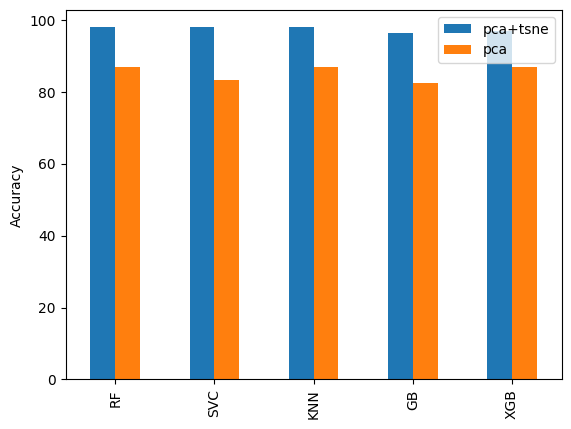

In [ ]:
analysis.plot(kind='bar')
plt.ylabel('Accuracy')


In [ ]:
2: [0.8704663212435233,
  0.8341968911917098,
  0.8704663212435233,
  0.8238341968911918,
  0.8704663212435233],

In [ ]:
sorted_dict={2: [0.8704663212435233,
  0.8341968911917098,
  0.8704663212435233,
  0.8238341968911918,
  0.8704663212435233],
 5: [0.9222797927461139,
  0.9067357512953368,
  0.9119170984455959,
  0.9067357512953368,
  0.9222797927461139],
 10: [0.9378238341968912,
  0.9119170984455959,
  0.9481865284974094,
  0.9326424870466321,
  0.9430051813471503],
 25: [0.9533678756476683,
  0.9689119170984456,
  0.9792746113989638,
  0.9533678756476683,
  0.9585492227979274],
 50: [0.9585492227979274,
  0.9948186528497409,
  0.9844559585492227,
  0.9430051813471503,
  0.9585492227979274]}

In [ ]:
x=list(sorted_dict.keys())

In [ ]:
rf=[]
svc=[]
knn=[]
gb=[]
xgb=[]
for v in list(sorted_dict.values()):
  rf.append(v[0])
  svc.append(v[1])
  knn.append(v[2])
  gb.append(v[3])
  xgb.append(v[4])



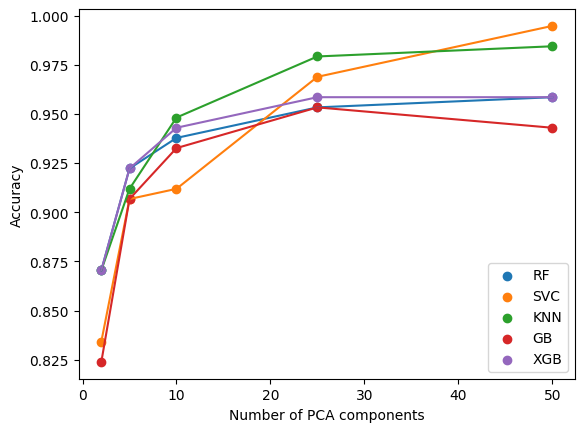

In [ ]:
for i,y in enumerate([rf,svc,knn,gb,xgb]):
  plt.scatter(x,y,label=m[i])
  plt.plot(x,y)

plt.legend(loc ="lower right")
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# from sklearn.ensemble import (
#     RandomForestClassifier,
#     AdaBoostClassifier,
#     GradientBoostingClassifier,
#     ExtraTreesClassifier,
#     BaggingClassifier,
# )
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import StratifiedKFold
# import xgboost as xgb

# clf1 = DecisionTreeClassifier(max_depth=7)
# clf2 = SVC(C=2, gamma=0.5, kernel='linear', tol=5e-05,probability=True)
# clf3 = GradientBoostingClassifier(max_depth=5, n_estimators=250)
# clf4 = RandomForestClassifier(max_depth=9, n_estimators=200)
# clf5 = KNeighborsClassifier(n_neighbors=3)
# clf6 = xgb.XGBRFClassifier(max_depth=8, n_estimators= 100)
# clf7 = linear_model.LogisticRegression(C=0.01,penalty='l2')
# eclf = VotingClassifier(
#             estimators=[
#                 ("decision_tree", clf1),
#                 ("svc", clf2),
#                 ("gradient_boosting", clf3),
#                 ("random_forest", clf4),
#                 ("knn", clf5),
#                 ("xgb",clf6),
#                 ("lr",clf7)
#             ],
#             voting="hard",
#             weights=[1,1,1,1,1,1,1],
#         )

In [ ]:
# from tqdm import tqdm
# score_list = []
# i = 0
# cv = StratifiedKFold(n_splits=10)
# for train, test in tqdm(cv.split(tsne_x,target_df)):
#   start=datetime.now()
#   eclf.fit(tsne_x[train],target_df[train])
#   score = eclf.score(tsne_x[test],target_df[test])
#   score_list.append(score)
#   print(f"Model took {datetime.now()-start}")
# print()
# print(f"validation score of ensemble classifier with cross validation: {round(np.mean(score_list)*100, 3)}% (+/- {round(np.std(score_list),3)})")

1it [00:01,  1.58s/it]

Model took 0:00:01.576071


2it [00:03,  1.63s/it]

Model took 0:00:01.659473


3it [00:07,  2.93s/it]

Model took 0:00:04.458758


4it [00:09,  2.42s/it]

Model took 0:00:01.643933


5it [00:10,  2.11s/it]

Model took 0:00:01.549010


6it [00:12,  1.92s/it]

Model took 0:00:01.543813


7it [00:13,  1.78s/it]

Model took 0:00:01.486587


8it [00:15,  1.71s/it]

Model took 0:00:01.549641


9it [00:17,  1.66s/it]

Model took 0:00:01.539562


10it [00:21,  2.14s/it]

Model took 0:00:04.353625

validation score of ensemble classifier with cross validation: 96.532% (+/- 0.035)


In [ ]:
# from sklearn.ensemble import StackingClassifier
# score_list = []
# level0 = list()
# level0.append(('lr', clf7))
# level0.append(('svc', clf2))
# level0.append(('dt', clf1))
# level0.append(('gb', clf3))
# level0.append(("random_forest", clf4))
# level0.append(("knn", clf5))
# level0.append(('xgb', clf6))
# level1 = linear_model.LogisticRegression()
# # define the stacking ensemble
# Stack_model = StackingClassifier(estimators=level0, final_estimator=level1)
# cv = StratifiedKFold(n_splits=10)
# for train, test in tqdm(cv.split(tsne_x, target_df)):
#   start=datetime.now()
#   Stack_model.fit(tsne_x[train],target_df[train])
#   score = Stack_model.score(tsne_x[test],target_df[test])
#   score_list.append(score)
#   print(f"Model took {datetime.now()-start}")

# print()
# print(f"validation score of ensemble classifier with cross validation: {round(np.mean(score_list)*100, 3)}% (+/- {round(np.std(score_list),3)})")

1it [00:15, 15.13s/it]

Model took 0:00:15.123244


2it [00:27, 13.35s/it]

Model took 0:00:12.103097


3it [00:37, 11.77s/it]

Model took 0:00:09.885148


4it [00:48, 11.79s/it]

Model took 0:00:11.818329


5it [00:57, 10.66s/it]

Model took 0:00:08.649324


6it [01:09, 11.10s/it]

Model took 0:00:11.940870


7it [01:19, 10.75s/it]

Model took 0:00:10.032113


8it [01:31, 10.98s/it]

Model took 0:00:11.467982


9it [01:39, 10.22s/it]

Model took 0:00:08.553075


10it [01:51, 11.14s/it]

Model took 0:00:11.762949

validation score of ensemble classifier with cross validation: 96.835% (+/- 0.02)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_df,grid_knn.best_estimator_.predict()))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       320
           1       1.00      0.99      0.99       252
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00        48

    accuracy                           1.00       964
   macro avg       1.00      1.00      1.00       964
weighted avg       1.00      1.00      1.00       964



In [ ]:
cm

array([[319,   0,   1,   0],
       [  3, 249,   0,   0],
       [  0,   0, 344,   0],
       [  0,   0,   0,  48]])

Text(0.5, 1.0, 'Confusion Matrix')

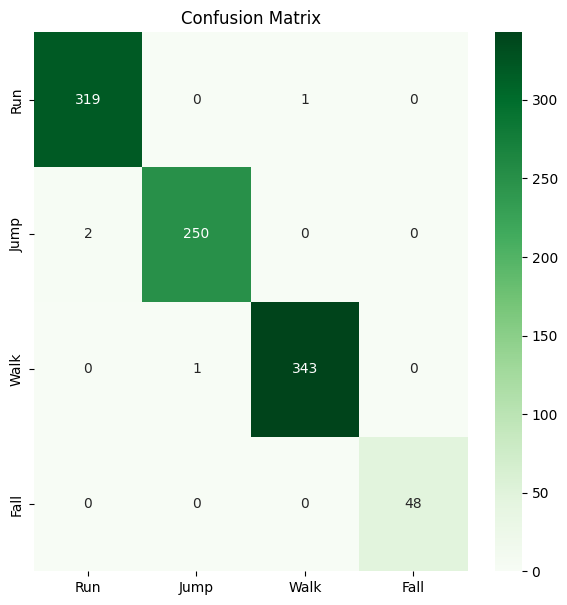

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize= (7,7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= plt.cm.Greens, xticklabels= list(activity.values()), yticklabels= list(activity.values()), )
plt.title('Confusion Matrix')

[]

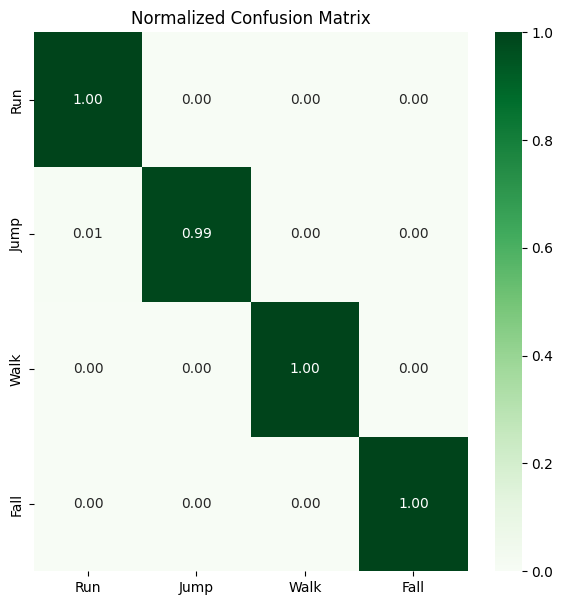

In [ ]:
ncm= cm/((cm.sum(axis=1).reshape(-1, 1)))
plt.figure(figsize= (7,7))
sns.heatmap(ncm, annot= True, fmt= '.2f', cmap= plt.cm.Greens, xticklabels= list(activity.values()), yticklabels= list(activity.values()), )
plt.title('Normalized Confusion Matrix')
plt.plot()

In [ ]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt

In [ ]:
def freq(signal,key):


# Perform Fourier transform
  frequency_spectrum = np.fft.fft(signal)
  frequencies = np.fft.fftfreq(len(signal), d=1/50)

# Plot the frequency spectrum
  plt.figure()
  plt.plot(frequencies[:len(frequencies)//2], np.abs(frequency_spectrum[:len(frequencies)//2]))
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Amplitude')
  plt.title(f'Frequency Spectrum {activity[key]} ')
  plt.show()

# Find the frequency range
  positive_frequencies = frequencies[:len(frequencies)//2]
  positive_spectrum = frequency_spectrum[:len(frequencies)//2]
  significant_indices = np.where(np.abs(frequency_spectrum) >0 )  # Adjust threshold as needed
  frequency_range = positive_frequencies[np.argmax(positive_spectrum)]
  print("Frequency Range:", frequency_range)



In [ ]:
from scipy.fft import fft
def frequency_analysis(data,tm,fs,key):
  x=fft(data)
  fr=(fs/2)*np.linspace(0,1,int(len(tm)/2))
  xm=(2/len(tm))*abs(x[0:np.size(fr)])
  plt.plot(fr,xm)
  plt.xlabel('Frequency(Hz)',fontsize=14)
  plt.ylabel('Amplitude Spectrum',fontsize=14)
  plt.title(f"Label : {activity[key]} Subject : V_adc_value")
  plt.show()

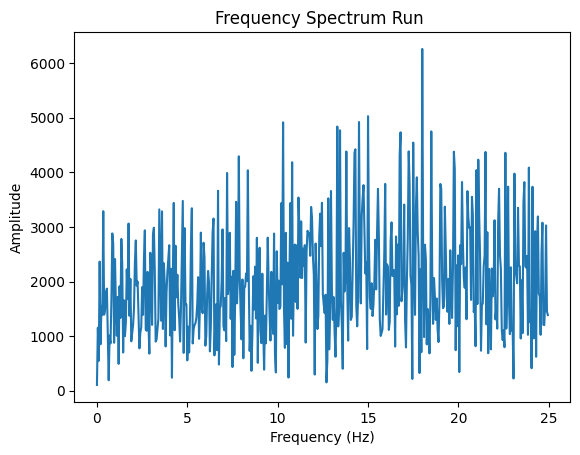

Frequency Range: 16.8


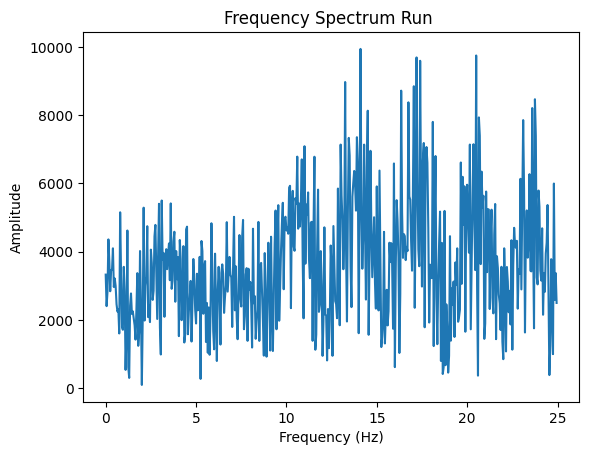

Frequency Range: 14.100000000000001


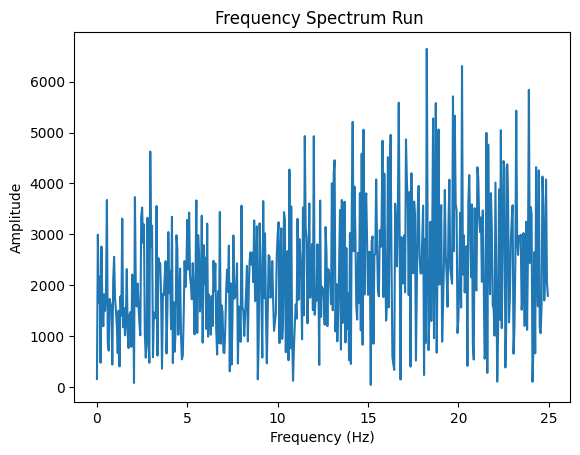

Frequency Range: 22.35


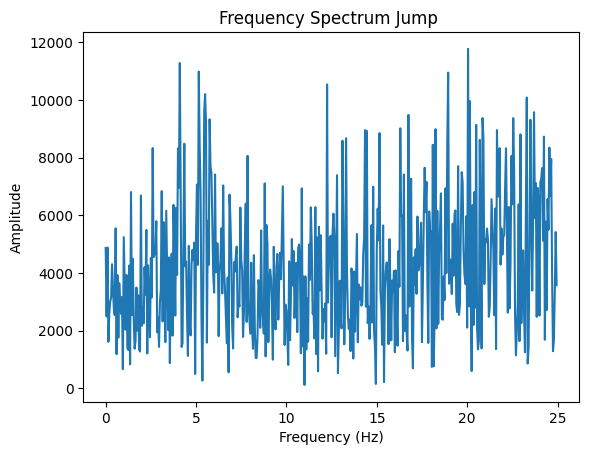

Frequency Range: 5.15


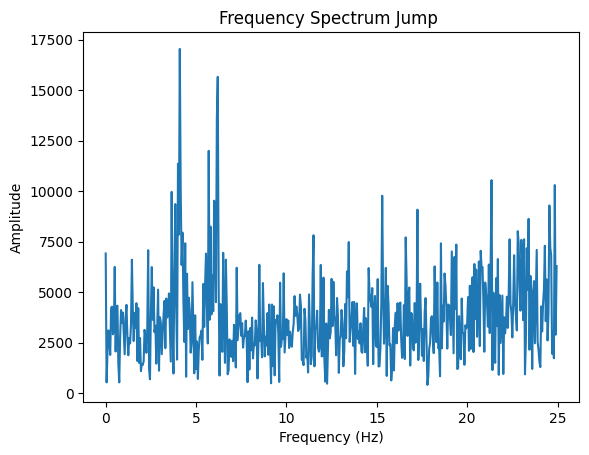

Frequency Range: 6.2


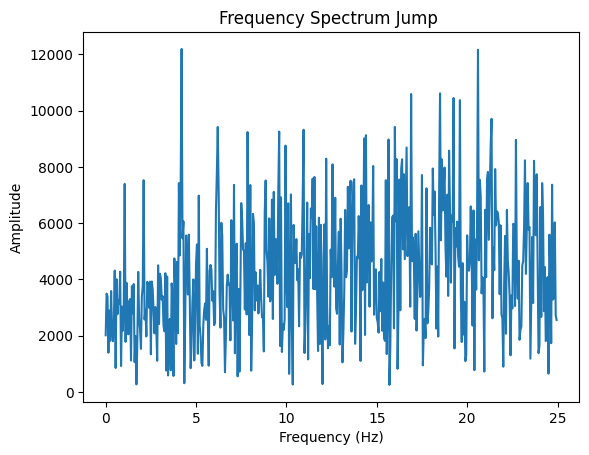

Frequency Range: 6.2


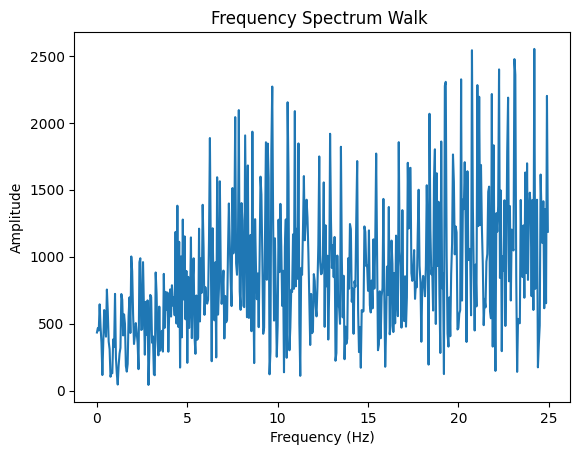

Frequency Range: 20.150000000000002


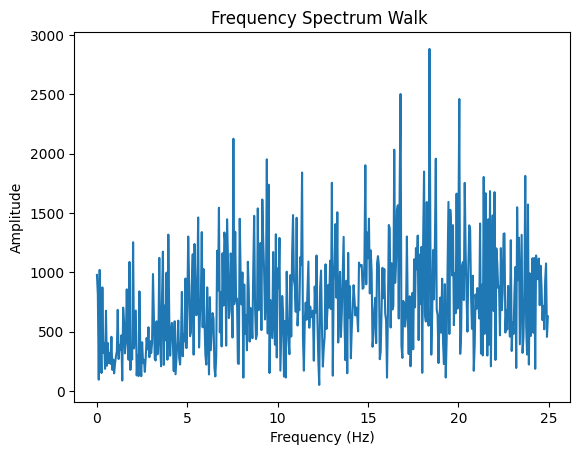

Frequency Range: 18.75


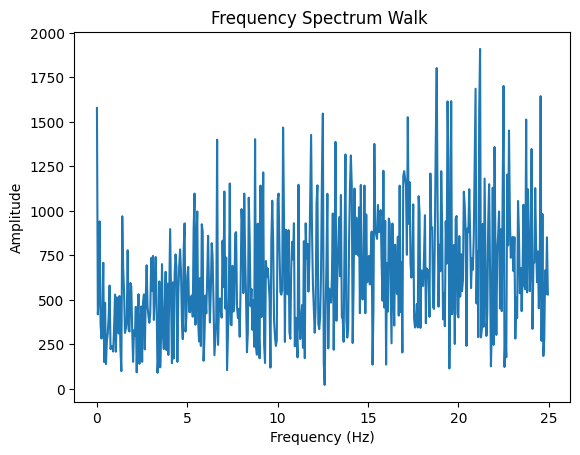

Frequency Range: 19.6


In [ ]:
x_axis=np.arange(0,1000/50,1/50)
for key,value in df.groupby('Target'):
  #fig,ax=plt.subplots(3,1,sharex=True,constrained_layout = True)
  for i in range(0,9,4):
    #for j in range(2):
     # if j==0:
        #frequency_analysis(value.V_adc_value[i*1000:(i+1)*1000].values,x_axis,50,key)

        freq(value.V_adc_value[i*1000:(i+1)*1000].values,key)
      #else:
       # ax[i,j].plot(x_axis,value.H_adc_value[:1000])
        #ax[i,j].set_title(f"Label : {activity[key]} Subject : {i+1} H_adc_value")


In [ ]:
spectrum=fft(y)
F=fftfreq(len(tm),1/50)
Fpositive=np.where(F>=0)
print(F.shape)
print(type(Fpositive))
print(spectrum.shape)
print(Fpositive)

(50,)
<class 'tuple'>
(50,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]),)


(0.0, 15.0)

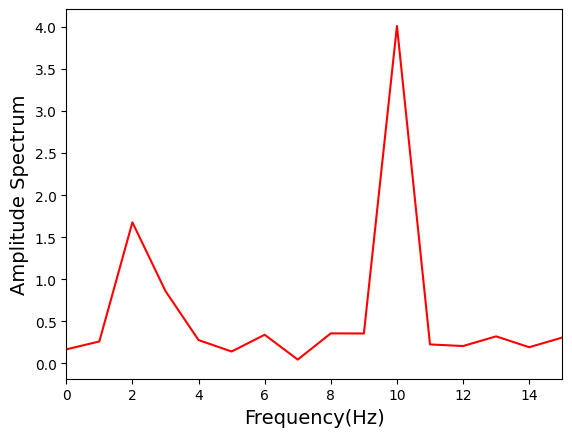

In [ ]:
plt.plot(F[Fpositive],2*np.absolute(spectrum[Fpositive])/len(tm),color='r')
plt.xlabel('Frequency(Hz)',fontsize=14)
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlim([0,15])

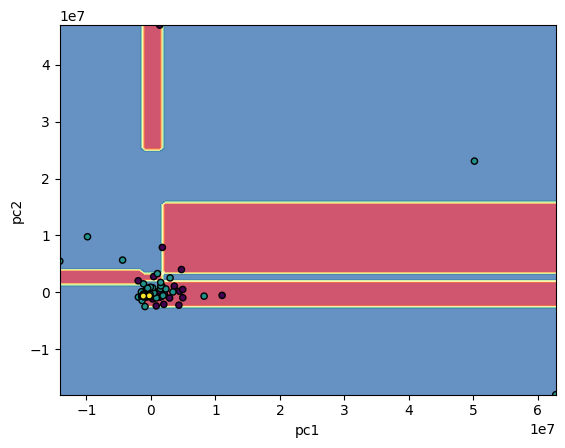

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		clf1,
		pca_res.drop(0,axis=1),
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		#xlabel=cancer.feature_names[0],
		#ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(pca_res.iloc[:, 0], pca_res.iloc[:, 1],
			c=pca_res.iloc[:,2],
			s=20, edgecolors="k")
plt.show()


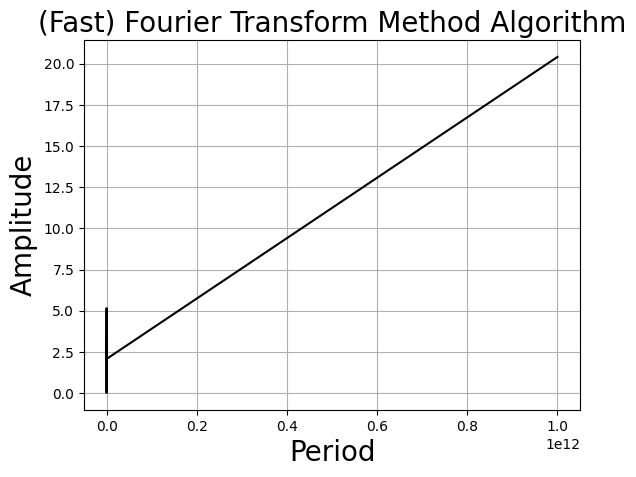

In [ ]:
import numpy as np
FFT =np.fft.fft(signal)
new_N=int(len(FFT)/2)
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
#plt.xlim(0,200)

Text(0, 0.5, 'Fourier Amplitude')

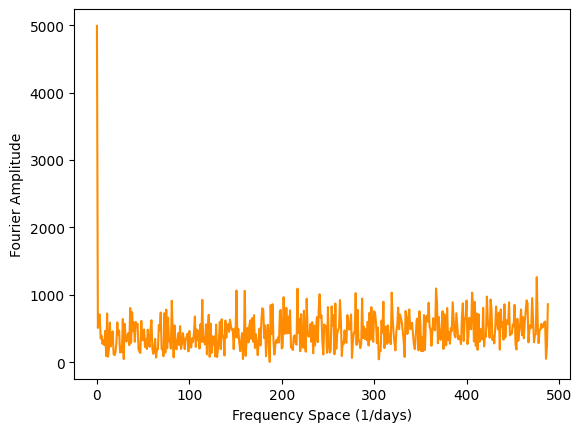

In [ ]:
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2.)],color='darkorange')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

In [ ]:
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

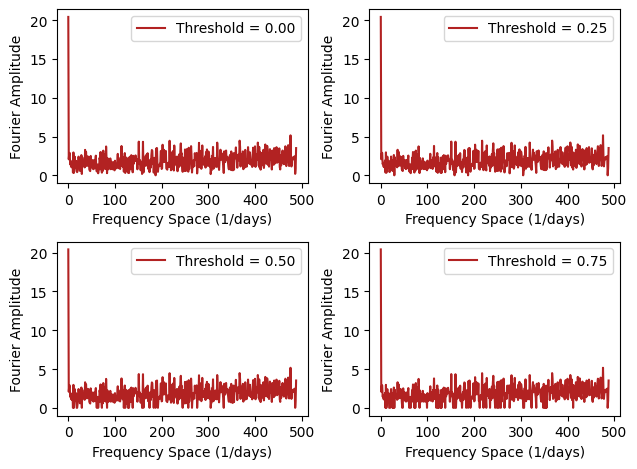

In [ ]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

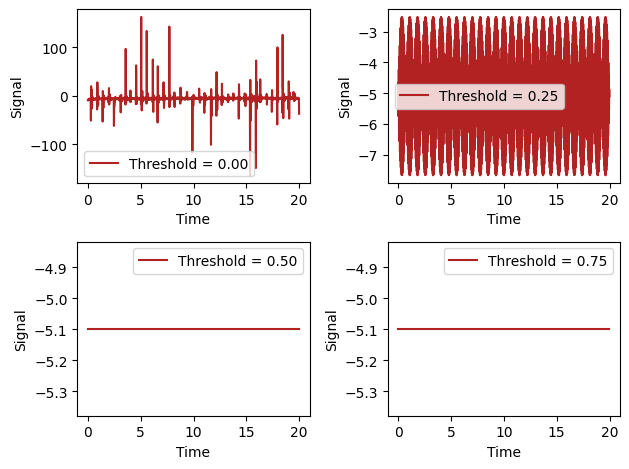

In [ ]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(data['time'],signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

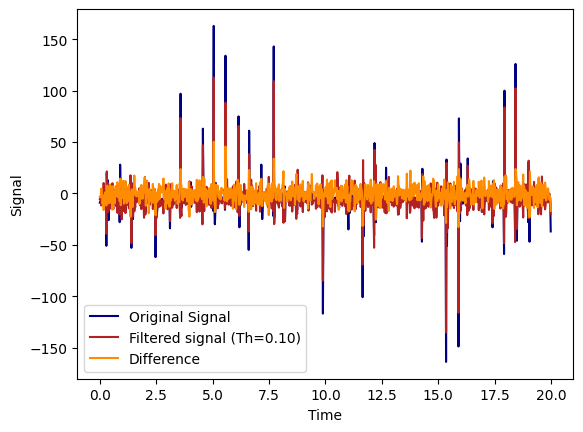

In [ ]:
th_example_value = 0.10
example_signal = filter_signal(th_example_value)
plt.plot(data['time'],signal,color='navy',label='Original Signal')
plt.plot(data['time'],example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_example_value))
plt.plot(data['time'],signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

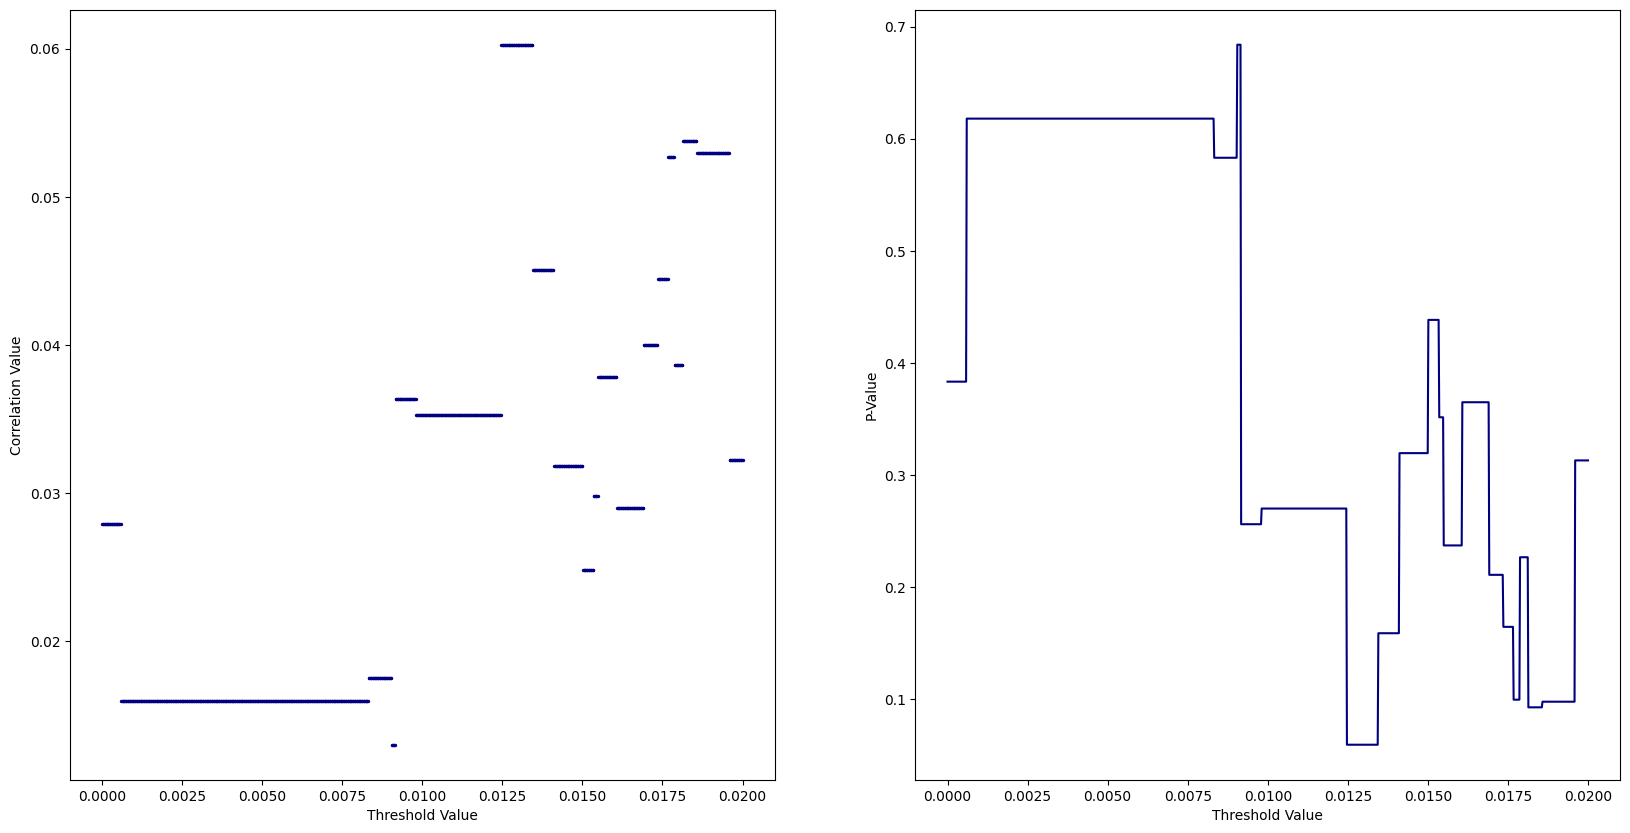

In [ ]:
from scipy.stats import spearmanr
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

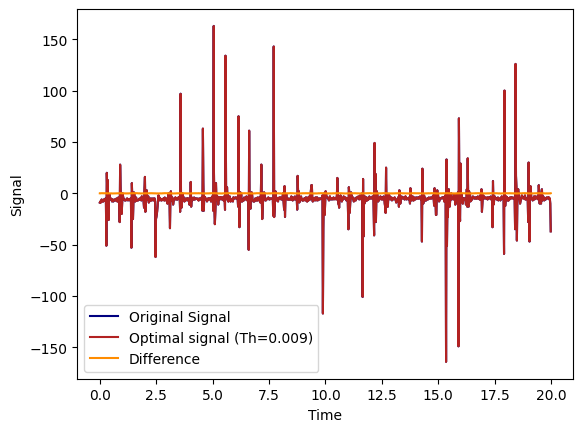

In [ ]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(th_opt)
plt.plot(data['time'],signal,color='navy',label='Original Signal')
plt.plot(data.time,opt_signal,color='firebrick',label='Optimal signal (Th=%.3f)'%(th_opt))
plt.plot(data.time,(signal-opt_signal),color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

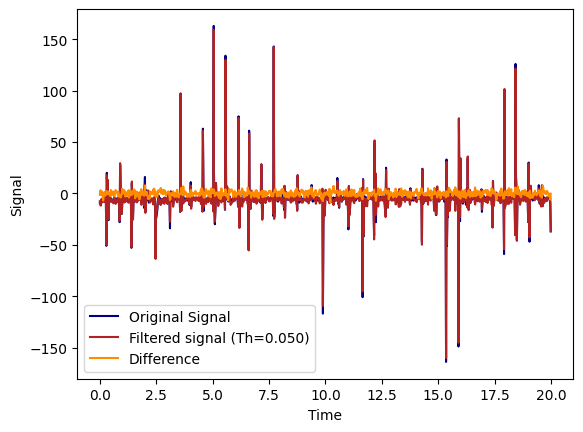

In [ ]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(0.05)
plt.plot(data.time,signal,color='navy',label='Original Signal')
plt.plot(data.time,opt_signal,color='firebrick',label='Filtered signal (Th=%.3f)'%(0.05))
plt.plot(data.time,(signal-opt_signal),color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


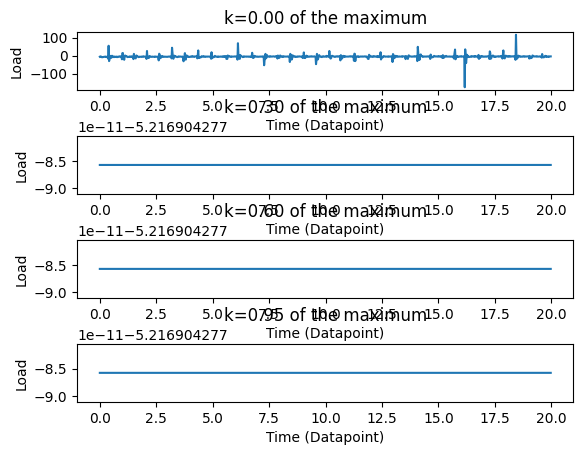

In [ ]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing some plots at different threshold values
K_plot_values=[0.0,0.30,0.60,0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(data.time,np.fft.ifft(fft_filter(k)))
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)

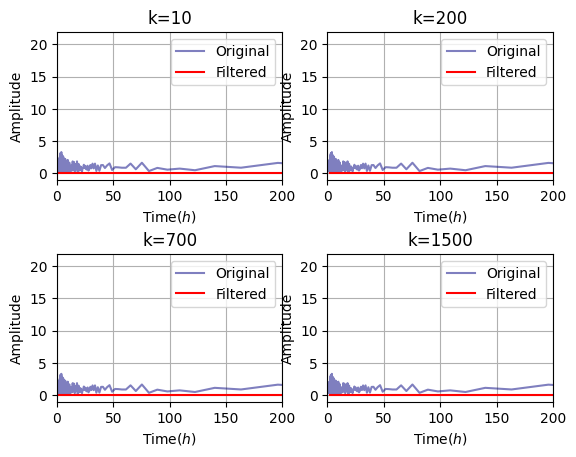

In [ ]:
K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)